In [1]:
# todo: check the model cfg: augmentations, policy
# todo batch dim in nms

In [5]:
from tqdm import tqdm
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm as colormap

###
import torch
from torch import nn
from utils import parse_cfg, predict_and_save
from darknet import Darknet

###
darknet = Darknet('cfg/yolov3_416x416.cfg')
weight_file = 'weights/yolov3.weights'
darknet.load_weights(weight_file)
darknet.eval();

###
device = torch.device('cpu:0')
model = darknet
labels_path='./data/coco.names'
img_path = 'dog-cycle-car.png'
# img_path = 'people_outside.jpg'
# img_path = 'city_hall.jpg'
# img_path = 'databreakfast_spb.jpg'
# img_path = '../../../../lT5TP3HVQkE.jpg'
# img_path = 'planes.jpg'
save_path = './output.jpg'
show = True

we also can remove bias due to bn
make_layers returns net_info as well. check whether it"s necessary
shortcut is using output[i-1] instead of x check whether works with x
NOTE THAT CONV BEFORE YOLO USES (num_classes filters) * num_anch
changing predictions in the nms loop make sure that it is not used later
not adding +1 in nms


/miniconda3/envs/main/lib/python3.5/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/miniconda3/envs/main/lib/python3.5/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


torch.Size([1, 10647, 85])
torch.Size([3, 85])


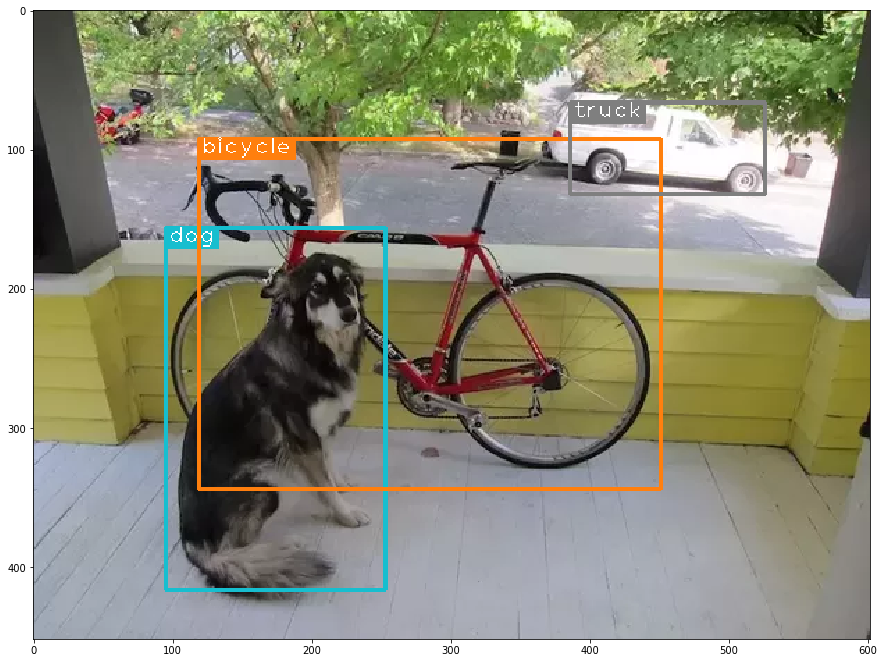

In [6]:
###
prediction = predict_and_save(img_path, save_path, model, device, labels_path, show)